##  <font color='maroon'>Lending Club Case Study</font> 
#### <u>Group Members:</u>
> Angshuman Roy - <b> Group Facilitator </b> <br>
> Raviteja Kalla<br>
> Gautam Jha<br>
> JP Mudugal<br>

### <u>Objective</u> : The financial company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. So they can make better decissions based on customers credibility to grant the loans

<img src="Loan.png">

<b>Key Notes : Please read</b>
1.  The analysis is split as the assignment provided - Checkpoint wise
2.  Only valid data from the table has been taken into consideration.  In the initial sections we have cleaned the data multiple times by removing irrevalent attributes.  Care has been taken to identify the outliers and remove them.
3.  Group has divided the relavant attributes and have factored carelly the Univariate and Bivariate analysis.
4.  No assumtpions are made with the data. All values shown here are original as per given data.
5.  Some metrics have been derives based on data understanding and business understanding


<b>Activities Performed:</b> <br>

<b>1. Data Loading and Understanding</b> <br>
> Collect relevant data<br>
> Verify data quality<br>
> Describing the data<br>
> <b>Explore and manipulate data data</b><br>
>>  Assessment of NULL values<br>
>>  Variables required for analysis<br>
>>  Assess the outliers<br>
>>  Assess and clean the missing values<br>

<b>2. Data Preparation</b><br>
> Usage valid attributes<br>
> Clean & Construct the data<br>
> Format the data<br>

<b>3. Data Analysis</b><br>
> Univariate & Segmented Univariate analysis<br>
> Bivariate/Multivariate Analaysis<br>


####  Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pandas import set_option
%matplotlib inline
sns.set(style = "darkgrid", rc = {"figure.figsize": (10, 8)})
sns.set(font_scale=1.5)
set_option('display.width', 100)
set_option('precision', 3)

##  <font color='maroon'> Data Understanding</font> 

Load the data 

In [2]:
loans = pd.read_csv('loan.csv',encoding='ISO-8859-1',na_values='NA')

Quick look at loan status & division of records by loan status

In [3]:
loans['loan_status'].value_counts(normalize=True)

Fully Paid     0.830
Charged Off    0.142
Current        0.029
Name: loan_status, dtype: float64

Observation <br>
> <b> 83% of loans are Fully Paid </b>.  <br>
> <b> 14% are Charged off.  <br>
> <b> 2% of loans are current.</b> <br>

For our analysis , we are looking to derive the features that impact the loan decission of the financial company.  Hence , we keep "Charged off" and "Fully Paid" loans for analysis and EDA.

In [4]:
loans = loans[loans['loan_status'] != 'Current']

In [5]:
tot_loan_records = len(loans)
print("Total number of loan records given in the dataset:", tot_loan_records)

Total number of loan records given in the dataset: 38577


Checking for the % of NULL values against each attribute that has been given for analysis

In [6]:
loans_capped = loans.copy()

In [7]:
tot_capped_loan_records = len(loans_capped)
print("Total number of loan records given in the dataset after removing Current loans:", tot_capped_loan_records)

Total number of loan records given in the dataset after removing Current loans: 38577


In [8]:
null_features = loans_capped.isnull().sum()
null_features[null_features > 0]*100/tot_capped_loan_records

emp_title                           6.185
emp_length                          2.678
desc                               32.473
title                               0.029
mths_since_last_delinq             64.559
mths_since_last_record             92.897
revol_util                          0.130
last_pymnt_d                        0.184
next_pymnt_d                      100.000
last_credit_pull_d                  0.005
collections_12_mths_ex_med          0.145
mths_since_last_major_derog       100.000
annual_inc_joint                  100.000
dti_joint                         100.000
verification_status_joint         100.000
tot_coll_amt                      100.000
tot_cur_bal                       100.000
open_acc_6m                       100.000
open_il_6m                        100.000
open_il_12m                       100.000
open_il_24m                       100.000
mths_since_rcnt_il                100.000
total_bal_il                      100.000
il_util                           

In [9]:
null_features = loans_capped.isnull().sum()
all_null_cols = null_features[null_features == tot_capped_loan_records].index
all_null_cols

Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       '

In [10]:
print("Total 100% nulls columns that can be dropped from analysis:", len(all_null_cols))

Total 100% nulls columns that can be dropped from analysis: 55


Please note there are 54 attributes that does not contain any value. Hence these can be dropped from analysis

In [11]:
loans_capped.drop(columns=all_null_cols,axis=0, inplace=True)

Recheck for the NULL% again

In [12]:
other_null_features = loans_capped.isnull().sum()
other_null_features[other_null_features >0]*100/tot_loan_records

emp_title                      6.185
emp_length                     2.678
desc                          32.473
title                          0.029
mths_since_last_delinq        64.559
mths_since_last_record        92.897
revol_util                     0.130
last_pymnt_d                   0.184
last_credit_pull_d             0.005
collections_12_mths_ex_med     0.145
chargeoff_within_12_mths       0.145
pub_rec_bankruptcies           1.807
tax_liens                      0.101
dtype: float64

In [13]:
plt.figure(figsize=(20,4))
other_null_features.plot(kind='bar')
plt.title('List of columns where null values are more')
plt.show()

Please note there are still some missing values espcially "mths_since_last_record" ,"loandesc" and "mths_since_last_delinq" with max missing data.  Let's further check and analyse if all these missing values can be imputed with some reasonable data.  

Check for numerical and non-numerical features to be considered for next level of cleaning and analysis. Data manupitation work 

In [14]:
loans_capped.select_dtypes(include=[np.number]).columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [15]:
loans_capped.select_dtypes(include=[np.object]).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

##  <font color='maroon'> Data Cleaning </font> 

<font color = 'maroon'> <b> Let's explore further on the data.  
To eliminate the features that does not help EDA </b> </font>

Look for columns that does not have adequate data by looking at column values
Eliminating the columns that has single unique value as it does not carry any coorelate with any oyther attributes of the dataset

In [16]:
cols_to_drop = []

In [17]:
def value_counts(colname):
    if len(loans_capped[colname].unique())==1:
        cols_to_drop.append(colname)

In [18]:
for i in loans_capped.columns:
    value_counts(i)

In [19]:
print(cols_to_drop)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


<b> Samples below </b> </br>
application_type::INDIVIDUAL - Only one value </br>
chargeoff_within_12_mths::0.0 - only 1 value </br>
collections_12_mths_ex_med::0.0 - only 1 value</br>
delinq_amnt::0   - Only 1 Value</br>
initial_list_status::F - Single value</br>
policy_code::Only 1 Value</br>
pymnt_plan::Single value - NA</br>
tax_liens::Only 1 Value</br>

Dropping the columns that carry no significance due to inadequate data

In [20]:
loans_capped = loans_capped.drop(cols_to_drop, axis=1)

In [21]:
print("Total required columns for next level if EDA :", len(loans_capped.columns))

Total required columns for next level if EDA : 48


#### Quick look at employee grade and Loan status

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='grade',y='loan_amnt',hue='loan_status',data=loans_capped,order=['A','B','C','D','E','F','G'])
plt.legend(loc='upper right')
plt.show()

<b> Grade , Sub Grade </b> are the categorical variables. </br>
Notice the correlation between Grade and loan amount. As the grade increases, the MEDIAN ask for loan also raises. Hence we keep Grade.  However, the relation to Grade and Sub Grade are tightly correlated. Hence., sub grade can be dropped from data set.

#### Quick look at Addr State and Loan status

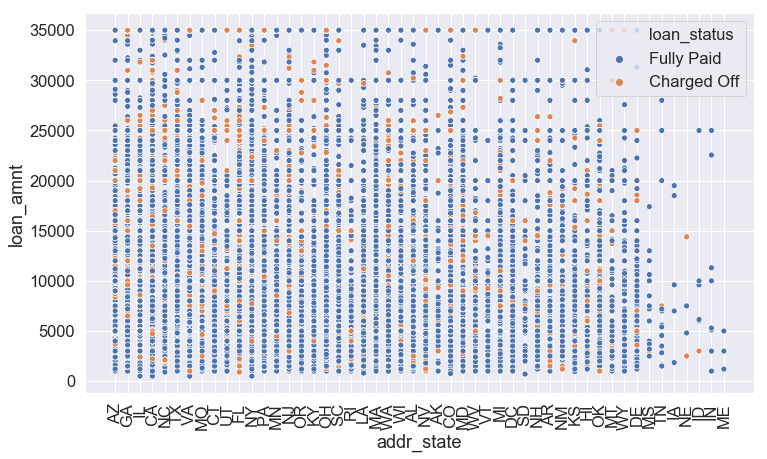

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='addr_state',y='loan_amnt',hue='loan_status',data=loans_capped)
plt.xticks(rotation=90)
plt.show()

Notice that loan status is scattered / sparesely populated across all regions.</br>
Also note that "TN","IA","NE", "ME","ID" and 'IN" has very limited Charged off loans.  But his does not provide inference that these areas are always non defaulted loans.  Given the number of loans are less we cannot infer or justify these locations to be having alweays non defaulted loans.
Hence, <b> addr and zip code </b> can be dropped as well.  In the current data set the loan status does not depend upon on location of the client </br>

Further - please note that <b> ID/URL and MEMBERID </b>columns are just unique numerical sequence variables and does not carry any significance for statistical analysis. 
Also, <b>tax_liens, collections_12_mths_ex_med and chargeoff_within_12_mths</b> are either 0 or does not contain value.<br>
similarly <b> emp_title </b> is arbitraty value. Does not carry significance.<br>
<b> loan title </b> is also the aribitrary value and does not help the EDA. Instead, We can use <u>loan purpose </u>which has consistent unordered categorical variables that can used for EDA <br>
Hence, these can be dropped as well

In [24]:
other_cols_to_drop = ['id','member_id','url','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens',
                     'sub_grade','emp_title','title', 'addr_state','zip_code'
                     ]

In [25]:
loans_capped = loans_capped.drop(other_cols_to_drop, axis=1)

In [26]:
print("Total columns in original dataset :", len(loans.columns))
print("Total columns for EDA after dropping insignificant columns :", len(loans_capped.columns))
print("Total % of columns dropped :", (len(loans.columns)-len(loans_capped.columns))*100/len(loans.columns))

Total columns in original dataset : 111
Total columns for EDA after dropping insignificant columns : 37
Total % of columns dropped : 66.66666666666667


PLEASE NOTE: Total <b> 67% </b> of the data has been dropped that does not carry any significance for EDA

##  <font color='maroon'> Data Cleaning - Outlier Detection </font> 
Let's perform outlier detection before we perform more cleaning and imputation of the data.
This is to make sure we apply correct imputation techniques in the data set

In the current notebook, we will use <b>extreme value analysis</b> to detect the outliers.  By looping at box plots, evaluating Quantiles and spread for loan amounts and annual incomes

This can be done by plotting Histograms and analysing by Skewness and Kurtosis of the distribution

Check the loan amount spread.

In [27]:
sns.boxplot(x='loan_status',y='loan_amnt',data=loans_capped)

Notice that loan amounts does not have much variance beteween the loan status for Fully Paid and Charged off loans. However, there are is a noted variance in <b> Current </b> loans. Appears the median loan amount requested for current loans is much higher comparitively.  To reconfirm let's look at skewness and kurtosis in normal distribution

In [28]:
sns.distplot(loans_capped.loan_amnt,bins=30,rug=True)
print('Skewness is ', loans_capped.loan_amnt.skew())
print('Kurtosis is ', loans_capped.loan_amnt.kurtosis())

Skewness is  1.0781026597810632
Kurtosis is  0.8429524525755574


Notice that based on rugs on the plot. The majority of the loans in the data less than 25K.

Check the annual income spread.

In [29]:
sns.distplot(loans_capped.annual_inc,bins=30,rug=True)
print("Skewness %.3f" %loans_capped['annual_inc'].skew())
print("Kurtosis %.3f" %loans_capped['annual_inc'].kurtosis())

Skewness 31.198
Kurtosis 2308.775


Notice that there is huge variance in the spread, also the skewness and kurtosis are very high.

Let's describe the annual income /loan amount basic statistics

In [30]:
from pandas import set_option
loans_capped['annual_inc'].describe()

count    3.858e+04
mean     6.878e+04
std      6.422e+04
min      4.000e+03
25%      4.000e+04
50%      5.887e+04
75%      8.200e+04
max      6.000e+06
Name: annual_inc, dtype: float64

Further let's take a look at quantiles from 25% to 100% to assess where the huge variance start showing up significanty

In [31]:
np.quantile(loans_capped['annual_inc'],[0.25,0.50,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99,1])

array([  40000.,   58868.,   82000.,   90000.,  115000.,  140004.,
        150000.,  165000.,  187000.,  234144., 6000000.])

Notice that from <b> 99 percentile</b> the loan amount has huge variance.  
The records after 99 percentile can be considered as outliers and casn be removed from dataset

Let's split the range of amount and describe the annual income to reconfirm the understanding

In [32]:
qcut_inc = pd.qcut(loans_capped['annual_inc'],[0.25,0.50,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99,1])

In [33]:
loans_capped.groupby(qcut_inc)['annual_inc'].agg({'min','max','mean','median','count'})

mean       min    median  count        max
annual_inc                                                             
(39999.999, 58868.0]    48537.871   40000.0   48747.0  10446  5.887e+04
(58868.0, 82000.0]      69011.165   58872.0   69000.0   9700  8.200e+04
(82000.0, 90000.0]      86627.016   82008.0   86000.0   2103  9.000e+04
(90000.0, 115000.0]    101473.921   90050.0  100000.0   3631  1.150e+05
(115000.0, 140004.0]   126414.272  115132.0  125000.0   1931  1.400e+05
(140004.0, 150000.0]   147373.595  140300.0  150000.0    437  1.500e+05
(150000.0, 165000.0]   158541.279  150060.0  160000.0    338  1.650e+05
(165000.0, 187000.0]   176251.992  165500.0  175000.0    378  1.870e+05
(187000.0, 234144.0]   206179.419  188004.0  200000.0    384  2.340e+05
(234144.0, 6000000.0]  411543.543  234600.0  300000.0    386  6.000e+06

Looking at above statistical data, it's evident that 386 records might be outliers and can be removed from dataset

Removing the outliers
Create two data sets => inliers and outliers

In [34]:
cleansed_loans_inliers = loans_capped[loans_capped['annual_inc'] 
                                    <= np.quantile(loans_capped['annual_inc'],0.99)]

In [35]:
cleansed_loans_outliers = loans_capped[loans_capped['annual_inc'] 
                                    >= np.quantile(loans_capped['annual_inc'],0.99)]

Now, let's look at inlier distributiuon followed by skewness and kurtosis

In [36]:
sns.distplot(cleansed_loans_inliers.annual_inc,bins=30,rug=True)
print("Skewness %.3f" %cleansed_loans_inliers['annual_inc'].skew())
print("Kurtosis %.3f" %cleansed_loans_inliers['annual_inc'].kurtosis())

Skewness 1.377
Kurtosis 2.492


Notice fair amount of reduction in skewness and kurtosis for annual incomes.
We can start using data for further analysis

However, there are still some potential outliers ,. we can assess these further if they really outliers based on confounding variables

Before we go for further analysis lets look at ZScores (with outliers and without outliers) to ensure that data for annual income is statistically significant

In [37]:
from scipy import stats
z_score_with_outliers = stats.zscore(loans_capped['annual_inc'])
print(z_score_with_outliers)
z_score_without_outliers = stats.zscore(cleansed_loans_inliers['annual_inc'])
print(z_score_without_outliers)

[-0.69728236 -0.60385039 -0.88022215 ...  0.48618922  2.04338868
 -0.72842635]
[-1.17534118 -1.00464568 -1.50956295 ...  0.98680174  3.83172663
 -1.23223968]


In [38]:
sns.distplot(z_score_without_outliers)

The zscores after cleaning the annual_income outliers ranges from "-2" to "+5"

There is still room to look at removing or treating the data that ranges from Zscore +2 to +5 depending on further requirements.
Let's park this for now before treating further

#### Let's look at Debt to Income ratio. Which is clear confounding variable that drives the status of loan,  depending on loan_amount and annual income

In [39]:
print("Mean of DTI in the dataset", cleansed_loans_inliers.dti.mean())

Mean of DTI in the dataset 13.333491136655264


In [40]:
qcut_inc_new = pd.qcut(cleansed_loans_inliers['annual_inc'],
                       [0.25,0.50,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99,1])

In [41]:
def highlight(s):
    is_one = s >= cleansed_loans_inliers['dti'].mean()
    return ['background-color: lightblue' if v else '' for v in is_one]

In [42]:
pv = cleansed_loans_inliers.groupby(qcut_inc_new)['dti'].agg({'mean'})

In [43]:
pv.style.apply(highlight)

Notice that two incomes ranges have mean DTI greater than data set mean.  However, these incomes ranges are where we have heavy population of data. Hence these cannot be outliers

#### Let's look at Instalment ammount. (Potential Confounding variable)

In [44]:
print("Mean of Instalment amount in the dataset", cleansed_loans_inliers.installment.mean())

Mean of Instalment amount in the dataset 319.93894058809377


In [45]:
cleansed_loans_inliers.groupby(qcut_inc_new)['installment'].agg({'min','max','mean','median','count'})

mean    min   median  count      max
annual_inc                                                   
(39999.999, 58000.0]  284.509  19.87  258.790  10355  1090.46
(58000.0, 80232.0]    349.359  16.08  312.820   9445  1302.69
(80232.0, 90000.0]    395.502  28.69  350.030   2449  1288.10
(90000.0, 111000.0]   417.212  30.77  373.220   3287  1272.20
(111000.0, 135000.0]  452.544  30.42  402.445   2000  1305.19
(135000.0, 140992.2]  453.080  25.28  390.690    284  1237.42
(140992.2, 150000.0]  488.215  53.69  437.390    428  1276.60
(150000.0, 165000.0]  521.658  49.67  494.090    338  1269.73
(165000.0, 189000.0]  507.684  31.11  486.620    383  1223.95
(189000.0, 234000.0]  537.693  32.45  511.790    379  1283.50

Notice that there not much variance betweeen MEAN and MEDIAN. Hence there are no outliers in this case

#### Let's look at Interest ammount. (Potential Confounding variable)

Convert INT_RATE into numeric feat - remove % symbol from the string and convert the type to integer

In [46]:
cleansed_loans_inliers['int_rate'] = cleansed_loans_inliers['int_rate'].str.replace('%','').astype(float)

In [47]:
print("Mean of Interest in the dataset", cleansed_loans_inliers.int_rate.mean())

Mean of Interest in the dataset 11.917875677515216


In [48]:
cleansed_loans_inliers.groupby(qcut_inc_new)['int_rate'].agg({'min','max','mean','median','count'})

mean   min  median  count    max
annual_inc                                              
(39999.999, 58000.0]  11.793  5.42  11.710  10355  23.91
(58000.0, 80232.0]    11.937  5.42  11.710   9445  24.11
(80232.0, 90000.0]    12.048  5.42  11.860   2449  23.91
(90000.0, 111000.0]   12.239  5.42  11.890   3287  24.11
(111000.0, 135000.0]  12.252  5.42  11.990   2000  23.91
(135000.0, 140992.2]  12.513  5.42  12.225    284  22.11
(140992.2, 150000.0]  12.368  5.42  11.830    428  24.11
(150000.0, 165000.0]  12.737  5.42  12.420    338  22.85
(165000.0, 189000.0]  12.672  5.42  12.420    383  23.91
(189000.0, 234000.0]  12.790  5.42  12.180    379  23.91

Notice that there not much variance betweeen MEAN and MEDIAN. Hence there are no outliers in this case

### Assess more NULL values if any before getting next set of data ready for analysis

In [49]:
null_features = cleansed_loans_inliers.isnull().sum()
null_features[null_features >0]*100/len(cleansed_loans_inliers)

emp_length                 2.692
desc                      32.474
mths_since_last_delinq    64.612
mths_since_last_record    92.870
revol_util                 0.128
last_pymnt_d               0.186
last_credit_pull_d         0.005
pub_rec_bankruptcies       1.801
dtype: float64

Notice there are couple if more columns that gave more than 60% NULLS
LEt's assses further in the next section with "Categorical VAriables"

In [50]:
cleansed_loans_inliers.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

##  <font color='maroon'> Data Manipulation & Imputation </font> 

#### Update to numeric features 

Convert TERM into numeric feat - remove months from the string and convert the type to integer

In [51]:
cleansed_loans_inliers['term'] = cleansed_loans_inliers['term'].str.replace('months','').astype(int)

In [52]:
cleansed_loans_inliers['term'].value_counts(normalize=True)

36    0.755
60    0.245
Name: term, dtype: float64

Note that 73% of the loans are taken for 36 months tenure

Convert  REVOL_UNTIL into numeric feat - remove % symbol from the string and convert the type to integer

In [53]:
cleansed_loans_inliers['revol_util'] = cleansed_loans_inliers['revol_util'].str.replace('%','').astype(float)

Convert Employment Length into numneric  feat - remove years.  Change 10+ years to 10,. <1 to 1 year as per requirement

In [54]:
cleansed_loans_inliers['emp_length'] = cleansed_loans_inliers['emp_length'].str.replace('years','')
cleansed_loans_inliers['emp_length'] = cleansed_loans_inliers['emp_length'].str.replace('year','')
cleansed_loans_inliers['emp_length'] = cleansed_loans_inliers['emp_length'].str.strip().replace('10+','10')
cleansed_loans_inliers['emp_length'] = cleansed_loans_inliers['emp_length'].str.replace('< 1','1')

Impute the missing employment length values based on loan_amount and annual_income 

In [55]:
plt.figure(figsize=(12,7))
sns.boxplot(x='emp_length',y='annual_inc',hue='loan_status',data=cleansed_loans_inliers,
            order=['1','2','3','4','5','6','7','8','9','10'])
plt.legend(loc='upper right')
plt.show()

Notice that employee length and annual_income does not have variances within 1.5 IQR.  (excluding incomes that falls outside IQR range, these may not be outliers)
Hence, given the majority of the data is consistent within IQR range, we can impute missing employment data with MODE

In [56]:
freq_emp_length = cleansed_loans_inliers['emp_length'].mode()
print("Frequent employement length : ", max(freq_emp_length))

Frequent employement length :  10


In [57]:
cleansed_loans_inliers['emp_length'] = cleansed_loans_inliers['emp_length'].fillna(10)

In [58]:
#cleansed_loans['emp_length'] = cleansed_loans['emp_length'].astype(int)

#### Quick look at missing values again

In [59]:
a = cleansed_loans_inliers.isnull().sum()
a[a>0]*100/len(cleansed_loans_inliers)

desc                      32.474
mths_since_last_delinq    64.612
mths_since_last_record    92.870
revol_util                 0.128
last_pymnt_d               0.186
last_credit_pull_d         0.005
pub_rec_bankruptcies       1.801
dtype: float64

Imputing revol_util, mths_since_last_record, pub_rec_bankruptcies and mths_since_last_delinq with 0.

In [60]:
cleansed_loans_inliers['mths_since_last_record'] = cleansed_loans_inliers['mths_since_last_record'].fillna(0)
cleansed_loans_inliers['mths_since_last_delinq'] = cleansed_loans_inliers['mths_since_last_delinq'].fillna(0)
cleansed_loans_inliers['pub_rec_bankruptcies'] = cleansed_loans_inliers['pub_rec_bankruptcies'].fillna(0)
cleansed_loans_inliers['revol_util'] = cleansed_loans_inliers['revol_util'].fillna(0)

In [61]:
a = cleansed_loans_inliers.isnull().sum()
a[a>0]*100/len(cleansed_loans_inliers)

desc                  32.474
last_pymnt_d           0.186
last_credit_pull_d     0.005
dtype: float64

##### Let's look at DESC, LAST_PAYMNT_D and LAST_CREDIT_PULL_D in details in coming EDA sections

##  <font color='maroon'> Data Manipulation and final cleaning - Using Correlation </font> 

Let's look at overall correlation of numerical variables.  TO understand if there are dependent features that are cauing high correlation.  These features can be also removed from analysis

Example : Overall payment is sum of "Payment Received in Interest" and "Payment Received in Principal". Given that these will be highly correlated internally. For out analysis purposes we can eliminate "Received Interest" and "Received Pricipal"

In [62]:
numeric_features = cleansed_loans_inliers.select_dtypes(include=[np.number])
corr = numeric_features.corr()

Looking at features that are correlation between 60% to 100% for further clean up.

loan_amnt                funded_amnt                0.982
                         funded_amnt_inv            0.938
                         installment                0.932
                         total_pymnt                0.880
                         total_pymnt_inv            0.846
                         total_rec_prncp            0.844
                         total_rec_int              0.728
funded_amnt              loan_amnt                  0.982
                         funded_amnt_inv            0.956
                         installment                0.958
                         total_pymnt                0.897
                         total_pymnt_inv            0.863
                         total_rec_prncp            0.862
                         total_rec_int              0.736
funded_amnt_inv          loan_amnt                  0.938
                         funded_amnt                0.956
                         installment                0.905
              

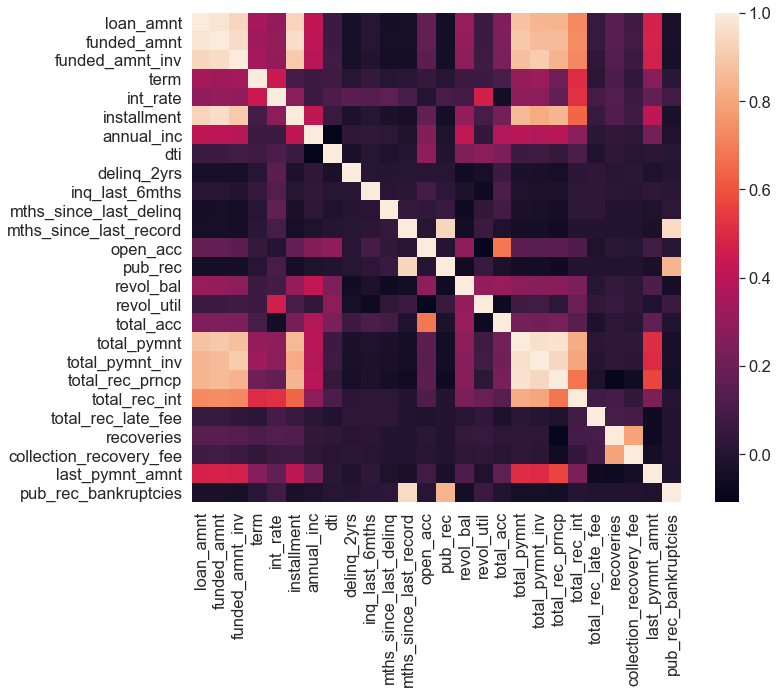

In [63]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True)
s = corr.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

Notice that "funding amount inv" and "total payment inv" are <b> correlated internally</b> with "Fuding Amount" and "Paymnent Amount" .  Hence , the "investor funding" and related "out_prncp_inv","investor payment" can be removed from analysis 

Also, the "total payment" is made of "interest received" and "pricipal amount".  Given that total payment is sum of interest and principla.  These two can be removed as well. 

The "loan amount" and "funded amount" are highly correlated.  Given tha loan amount is actual loan requested by requestor .  the Funding amount can be dropped from analysis to determine the loan status

In [64]:
more_cols_to_drop = ['funded_amnt','funded_amnt_inv','total_pymnt_inv','total_rec_prncp','total_rec_int']

In [65]:
cleansed_loans_inliers.drop(columns=more_cols_to_drop,axis=0, inplace=True)

### Relook at correlation again

In [66]:
numeric_features = cleansed_loans_inliers.select_dtypes(include=[np.number])
corr = numeric_features.corr()

loan_amnt                installment                0.932
                         total_pymnt                0.880
installment              loan_amnt                  0.932
                         total_pymnt                0.857
mths_since_last_record   pub_rec                    0.936
                         pub_rec_bankruptcies       0.952
open_acc                 total_acc                  0.686
pub_rec                  mths_since_last_record     0.936
                         pub_rec_bankruptcies       0.843
total_acc                open_acc                   0.686
total_pymnt              loan_amnt                  0.880
                         installment                0.857
recoveries               collection_recovery_fee    0.794
collection_recovery_fee  recoveries                 0.794
pub_rec_bankruptcies     mths_since_last_record     0.952
                         pub_rec                    0.843
dtype: float64

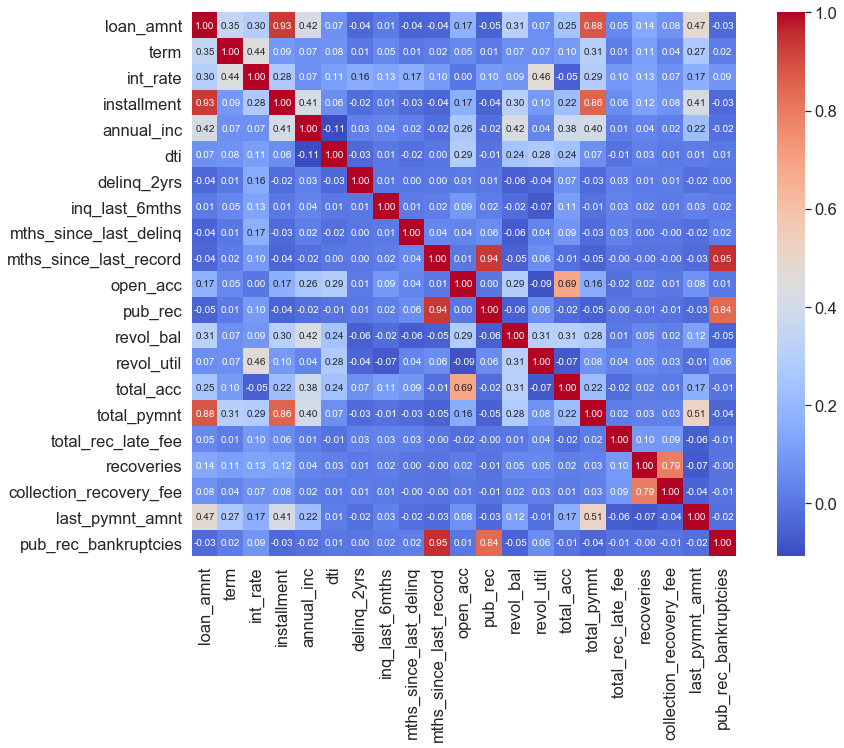

In [67]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, square=True,cmap='coolwarm',annot=True,fmt='.2f')
s = corr.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

### Here we complete the "Data Cleaning and Manipulation process".  NExt step is to segregate the numerical and categorical feats for Univariate and Bi Variate Analysis

#### Numerical / Quantitative feats

In [68]:
cleansed_loans_inliers.select_dtypes(include=[np.number]).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

#### Non-Numerical and Categorical feats

In [69]:
cleansed_loans_inliers.select_dtypes(include=[np.object]).columns

Index(['grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'desc', 'purpose', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

##  <font color='maroon'> Univariate & Segmented Univariate Data Analysis </font> 

### Plotting Univariate analysis for "loan purpose" 

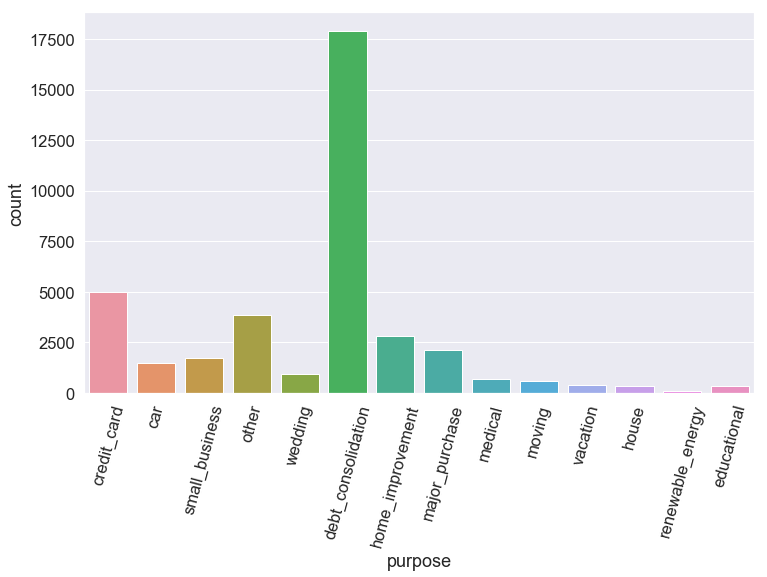

In [70]:
plt.figure(figsize=(12,7))
g = sns.countplot(x='purpose',data=cleansed_loans_inliers)
plt.xticks(rotation=75)
plt.show()

Notice that "Debt Consolidation" loans are prominent in the data set followed by "Credit Card". Where as the "renewable energy" and vacation" and "educational" loans are least requested by customers

### Plotting Univariate analysis for "interest rate"  & "installment"

Skewness 0.292
Kurtosis -0.449


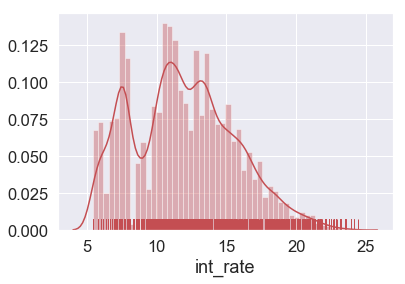

In [71]:
sns.distplot(cleansed_loans_inliers['int_rate'],bins=50,rug=True,color='r')
print("Skewness %.3f" %cleansed_loans_inliers['int_rate'].skew())
print("Kurtosis %.3f" %cleansed_loans_inliers['int_rate'].kurtosis())

In [72]:
cleansed_loans_inliers['int_rate'].describe()

count    38191.000
mean        11.918
std          3.684
min          5.420
25%          8.940
50%         11.710
75%         14.350
max         24.400
Name: int_rate, dtype: float64

Notice that the "interest rates" are common between 9% to 14%.  It can also be observed the distribution does not have huge variance on mean and median interest rates.  Hence, outliers are either minimal or no there

Also the distribution is Multi Modal.  Hence, the inerest rates vary for a specific group of people. We can further analyse on interest rates vary in Segmented analysis

Skewness 1.141
Kurtosis 1.302


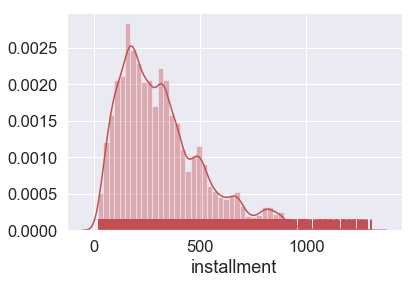

In [73]:
sns.distplot(cleansed_loans_inliers['installment'],bins=50,rug=True,color='r')
print("Skewness %.3f" %cleansed_loans_inliers['installment'].skew())
print("Kurtosis %.3f" %cleansed_loans_inliers['installment'].kurtosis())

In [74]:
cleansed_loans_inliers['installment'].describe()

count    38191.000
mean       319.939
std        205.948
min         15.690
25%        165.380
50%        276.300
75%        421.800
max       1305.190
Name: installment, dtype: float64

Notice that the "installment" is left skewed.  Hence, you will see a huge varaiance between MEAN and MEDIAN values. 
Will be intersting to see why Instalments have big variance when interest rates are not.  This can be further inferred from Segmented analysis

#### Segmented Univariate between "loan purpose" and "interest rate" / "installment" / "recoveries" and "debt to income ratio"

In [75]:
loan_purpose_UV = cleansed_loans_inliers[['purpose','loan_status','loan_amnt',
                                          'annual_inc','int_rate','installment','recoveries','dti']]

In [76]:
loan_purpose_UV = pd.get_dummies(loan_purpose_UV,columns=['loan_status'])

In [77]:
loan_purpose_UV.head()

purpose  loan_amnt  annual_inc  int_rate  installment  recoveries    dti  \
0     credit_card       5000     24000.0     10.65       162.87        0.00  27.65   
1             car       2500     30000.0     15.27        59.83      117.08   1.00   
2  small_business       2400     12252.0     15.96        84.33        0.00   8.72   
3           other      10000     49200.0     13.49       339.31        0.00  20.00   
5         wedding       5000     36000.0      7.90       156.46        0.00  11.20   

   loan_status_Charged Off  loan_status_Fully Paid  
0                        0                       1  
1                        1                       0  
2                        0                       1  
3                        0                       1  
5                        0                       1

In [78]:
pv_intrate = loan_purpose_UV.pivot_table(index='purpose',
                              values=['int_rate','loan_status_Charged Off','loan_status_Fully Paid'],
                             aggfunc = 'mean')
pv_installment = loan_purpose_UV.pivot_table(index='purpose',
                              values=['installment','loan_status_Charged Off','loan_status_Fully Paid'],
                             aggfunc = 'mean')
pv_dti = loan_purpose_UV.pivot_table(index='purpose',
                              values=['dti'],
                             aggfunc = 'mean')
pv_recoveries = loan_purpose_UV.pivot_table(index='purpose',
                              values=['recoveries'],
                             aggfunc = 'mean')

In [79]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [80]:
def highlight_intrate(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_one = s >= loan_purpose_UV['int_rate'].mean()
    return ['background-color: yellow' if v else '' for v in is_one]

def highlight_installment(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_one = s >= loan_purpose_UV['installment'].mean()
    return ['background-color: yellow' if v else '' for v in is_one]

def highlight_dti(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_one = s >= loan_purpose_UV['dti'].mean()
    return ['background-color: lightblue' if v else '' for v in is_one]

def highlight_recoveries(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_one = s >= loan_purpose_UV['recoveries'].mean()
    return ['background-color: lightgreen' if v else '' for v in is_one]

In [81]:
multi_table([pv_intrate.style.apply(highlight_intrate),
             pv_dti.style.apply(highlight_dti),
             pv_recoveries.style.apply(highlight_recoveries)])

Note that "Small business ", "debt consolidation" and "house" are payment higher interests / recoveries when compared relatively to other loan purpose categories

In [82]:
multi_table([pv_installment.style.apply(highlight_installment),
            pv_dti.style.apply(highlight_dti),
             pv_recoveries.style.apply(highlight_recoveries)])


Note that "Small business ", "debt consolidation" ,"credit card" and "house" are payment higher installments when compared to other loan purpose categories

Let's put together final observations on loan purpose

Hence , we can infer that <b> SMALL BUSINESS / Debt Consoldation / Credit Card and House loans are at high default rate </b> in the given order.  
This is due to the fact \ that they concur to "heavy interest rates" and "installments" , also "recovery rate" is high for these loan categories along with "dti" (PS: this inference as per segmented analysis shown above in highlighted grids)

### Plotting Univariate analysis for distribution of "loan amount"  & "annual incomes"

Skewness 1.377
Kurtosis 2.492


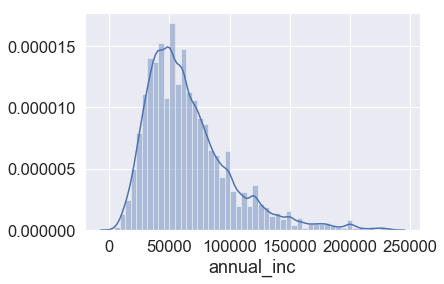

In [83]:
sns.distplot(cleansed_loans_inliers['annual_inc'])
print("Skewness %.3f" %cleansed_loans_inliers['annual_inc'].skew())
print("Kurtosis %.3f" %cleansed_loans_inliers['annual_inc'].kurtosis())
plt.show()

Skewness 1.077
Kurtosis 0.861


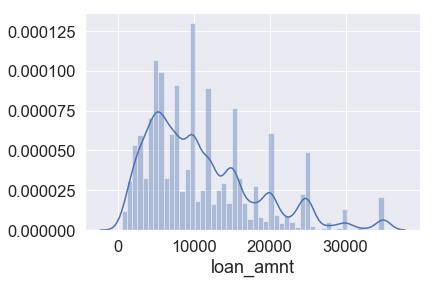

In [84]:
sns.distplot(cleansed_loans_inliers['loan_amnt'])
print("Skewness %.3f" %cleansed_loans_inliers['loan_amnt'].skew())
print("Kurtosis %.3f" %cleansed_loans_inliers['loan_amnt'].kurtosis())
plt.show()

Notice that the <b>loan seekers are reducing in number as the loan amount is increasing</b>.  However the annual income is heavily concentraed betwee 50000 to 150000.

### Segmented Univariate analysis of Employee Length vs "loan_amount" and "annual_income"

In [85]:
plt.figure(figsize=(12,7))
sns.boxplot(x='emp_length',y='annual_inc',hue='loan_status',data=cleansed_loans_inliers,
            order=['1','2','3','4','5','6','7','8','9','10'])
plt.legend(loc='upper right')
plt.show()

In [86]:
plt.figure(figsize=(12,7))
sns.boxplot(x='emp_length',y='loan_amnt',hue='loan_status',data=cleansed_loans_inliers,
            order=['1','2','3','4','5','6','7','8','9','10'])
plt.legend(loc='upper right')
plt.show()

Notice that the charged off loans are higher IQR when compared to fully paid loans.  However, for the annual incomes we don't see much variance between charged off and fully paid loans.
This will need further analysis on how other features are affecting the charge off.

 #### Univariate analysis of Term

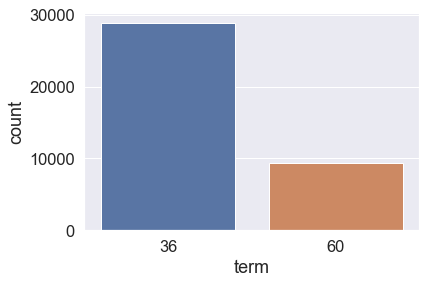

In [87]:
sns.countplot(x='term', data=cleansed_loans_inliers)

Notice that many loans are sought for less term compared to longer terms.

 #### Univariate analysis of Recoveries / Collection Recovery Fees against Charged-off and Paid loans

In [88]:
loan_recoveries = cleansed_loans_inliers.groupby('loan_status')['recoveries'].mean()
print(loan_recoveries)

loan_status
Charged Off    667.546
Fully Paid       0.000
Name: recoveries, dtype: float64


Notice that recoveries are directly correlated to charged off loans.  Hence, any customer prone to recovery has high chances to default the loan

In [89]:
loan_inquiries = cleansed_loans_inliers.groupby('loan_status')['collection_recovery_fee'].mean()
print(loan_inquiries)

loan_status
Charged Off    86.033
Fully Paid      0.000
Name: collection_recovery_fee, dtype: float64


Similarly collection recovery fees, has high changes of loans that are prone to be defaulted.

 #### Univariate analysis of number of credit accounts

In [90]:
open_accounts = cleansed_loans_inliers.groupby('loan_status')['open_acc'].median()
print(open_accounts)
sns.barplot(x='loan_status', y='open_acc', data=cleansed_loans_inliers, estimator=np.mean)

loan_status
Charged Off    8
Fully Paid     9
Name: open_acc, dtype: int64


The number of open accounts , have minimal or no impact on the loan status

 #### Segmented Univariate analysis between payments made and loan amount sought

In [91]:
loan_payments_UV = cleansed_loans_inliers[['term','loan_status','loan_amnt',
                                          'total_pymnt','int_rate','installment','recoveries','dti']]

In [92]:
loan_payments_UV.head()

term  loan_status  loan_amnt  total_pymnt  int_rate  installment  recoveries    dti
0    36   Fully Paid       5000     5863.155     10.65       162.87        0.00  27.65
1    60  Charged Off       2500     1008.710     15.27        59.83      117.08   1.00
2    36   Fully Paid       2400     3005.667     15.96        84.33        0.00   8.72
3    36   Fully Paid      10000    12231.890     13.49       339.31        0.00  20.00
5    36   Fully Paid       5000     5632.210      7.90       156.46        0.00  11.20

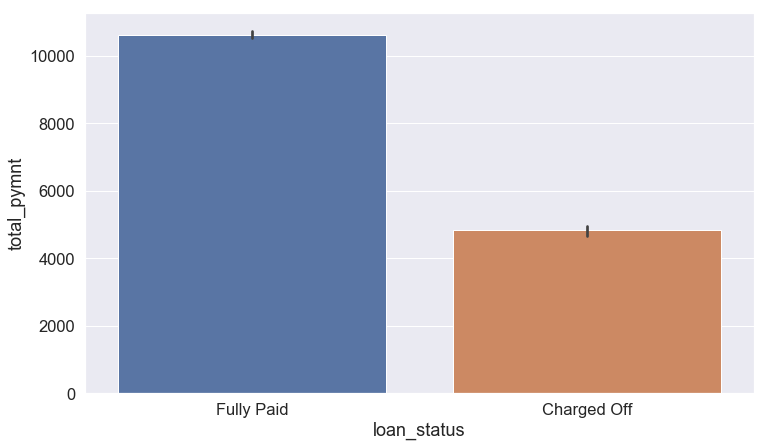

In [93]:
plt.figure(figsize=(12,7))
sns.barplot(x='loan_status',y='total_pymnt',data=loan_payments_UV,estimator=np.median)

Notice that the median "Payments" of charged off loans is much lesser than "Fully Paid" loans.  THis kind of explains the late tge payments and irregular payments of Charged off customers

 #### Segmented Univariate analysis of Home Ownership 

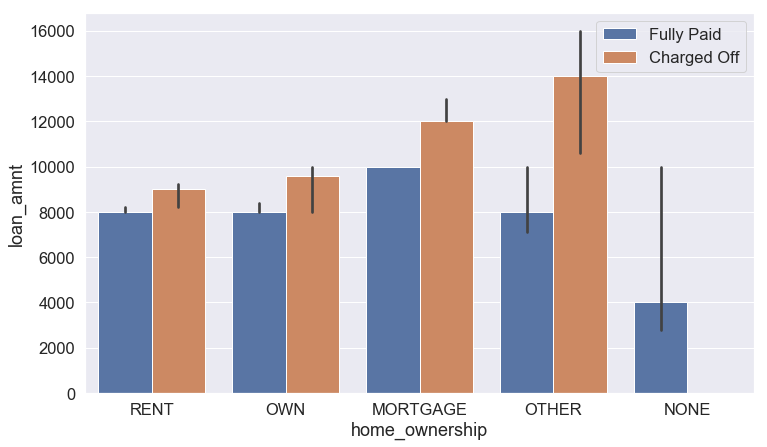

In [94]:
plt.figure(figsize=(12,7))
sns.barplot(x='home_ownership', y='loan_amnt',data=cleansed_loans_inliers, hue='loan_status',estimator=np.median)
plt.legend(loc='upper right')
plt.show()

Notice that the median "house ownership" has some effect on charged off loans.  Pattern is noted that default rate is high on "Mortagaged" and "Other" residency category of the loan seeker.

##  <font color='maroon'> Bivariate &  Multivariate Data Analysis With CONCLUSIONS</font> 

#### Bi-variate analysis between loan amount request and annual income

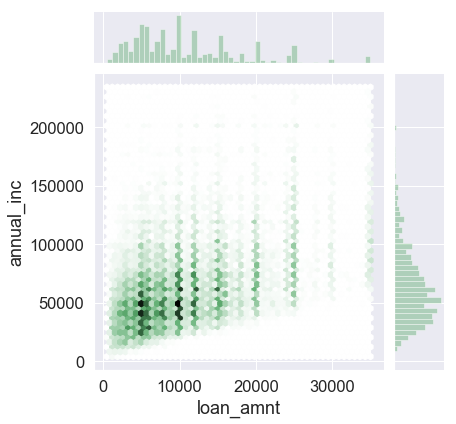

In [95]:
sns.jointplot(cleansed_loans_inliers['loan_amnt'], 
              cleansed_loans_inliers['annual_inc'], kind="hex",color='g')

Given that density of plot is concentrated towards lower left of the plot.  Note that most of the loans are requested only by the lower-middle income people.

### Bi-variate analysis between loan amount request and interest rate

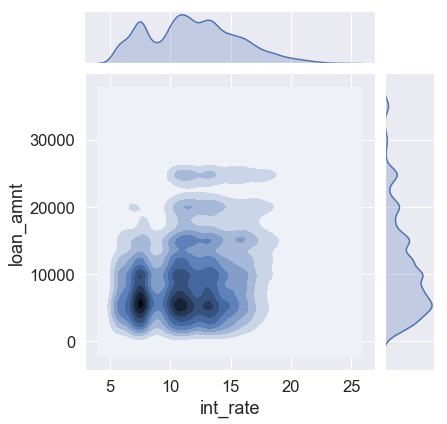

In [96]:
sns.jointplot(cleansed_loans_inliers['int_rate'], 
              cleansed_loans_inliers['loan_amnt'], kind="kde",color='b')

From the above KDE plot it's evident that the interest rate is pretty much fixed in most of the cases for the given range of loan amounts requested. However, there are some areas where same loan amount is little higher interest rate in most of the cases

### Probabability of defaults by loan purpose.

The analysis is concentrated to find out which attributes are impacting most on the loan status, The Consumer who has taken the loan will sucessfully complete the Loan amount is fully paid or will default i.e been charged off.

We will do the calculation based on column wise, how the Deciding factor Loan status is been affected under various circumtances,

In the below function we are calculating the Probability of charged Loans which will be equal to the No of customers charged off / Total no of consumers.

In [97]:
def crosstab(df,column):

    crosstab = pd.crosstab(df[column], df['loan_status'],margins=True)
    crosstab['Probability_of_Charged_Loans'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [98]:
purpose = crosstab(cleansed_loans_inliers,'purpose')
display(purpose)

loan_status         Charged Off  Fully Paid    All  Probability_of_Charged_Loans
purpose                                                                         
car                         160        1331   1491                         0.107
credit_card                 537        4450   4987                         0.108
debt_consolidation         2752       15165  17917                         0.154
educational                  55         268    323                         0.170
home_improvement            338        2459   2797                         0.121
house                        58         299    357                         0.162
major_purchase              220        1909   2129                         0.103
medical                     106         568    674                         0.157
moving                       91         479    570                         0.160
other                       629        3202   3831                         0.164
renewable_energy             19          81    100                         0.190
small_business              472        1251   1723                         0.274
vacation                     53         322    375                         0.141
wedding                      94         823    917                         0.103

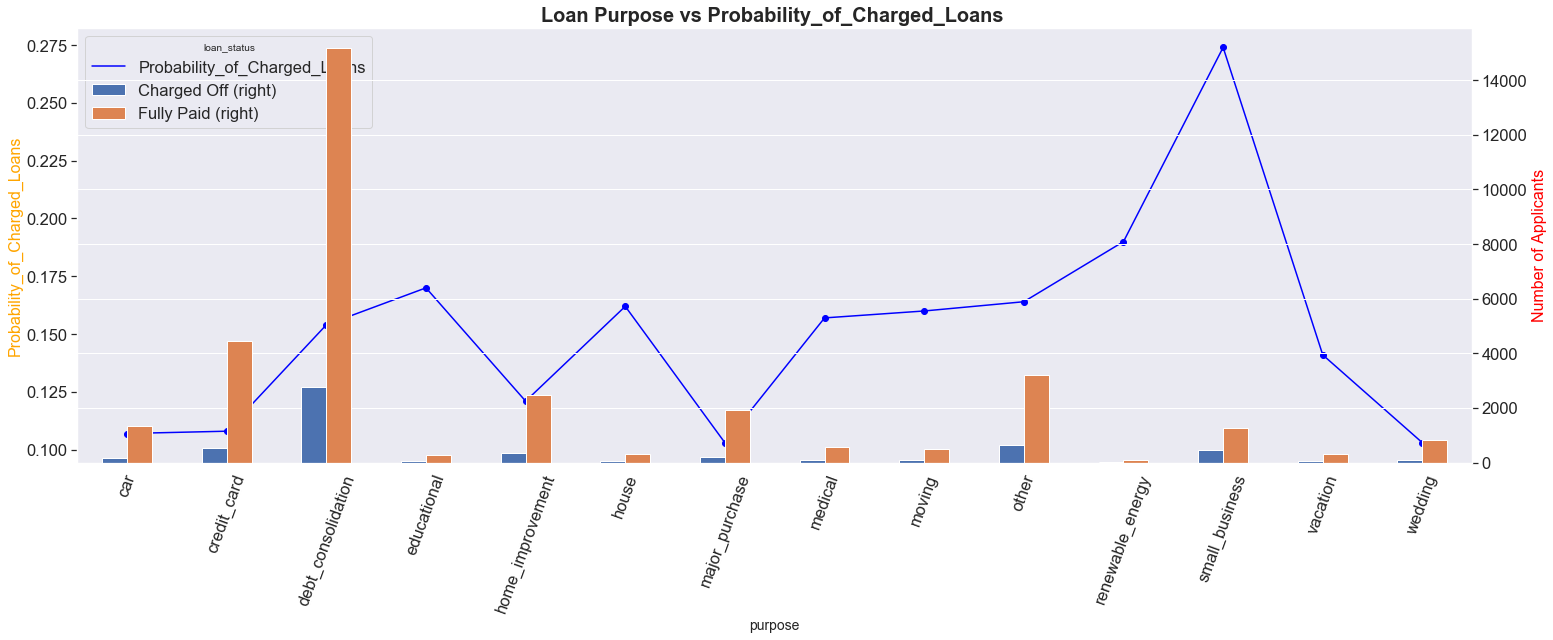

In [99]:
plotMajor = crosstab(cleansed_loans_inliers,'purpose') 
linePlot = plotMajor[['Probability_of_Charged_Loans']]      
barPlot =  plotMajor.iloc[:,0:2]
ax = linePlot.plot(figsize=(25,8), marker='o',color = 'blue')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=70,secondary_y=True)
ax.set_title('Loan Purpose vs Probability_of_Charged_Loans ',fontsize=20,weight="bold")
ax.set_xlabel('purpose',fontsize=14)
ax.set_ylabel('Probability_of_Charged_Loans',color = 'orange',fontsize=16)
ax2.set_ylabel('Number of Applicants',color = 'red',fontsize=16)
plt.show()

From the above plot it is evident that Small Business is the purpose where applicants are more likely to default, Heance we can suggest the bank to maybe reduce the interest rate for the applicants who is applying for the loan in small business categories or Take a good amount of assets as a guarentee before approving the Loan.

### Probabability of defaults by Annual Income.

In [100]:
cleansed_loans_inliers["annual_inc"] = pd.to_numeric(cleansed_loans_inliers.annual_inc, errors='coerce')
buckets = [0, 5500, 10500, 15500, 20500, 25500,40500,45500]
slot = ['0-5500', '5500-10500', '10500-15500', '15500-20500', '20500-25500','25500-40500','40500 and above']
cleansed_loans_inliers['annual_inc_range'] = pd.cut(cleansed_loans_inliers['annual_inc'], buckets, labels=slot)

loan_status       Charged Off  Fully Paid   All  Probability_of_Charged_Loans
annual_inc_range                                                             
0-5500                      2           9  2731                         0.001
5500-10500                 25          73  7132                         0.004
10500-15500                98         308   406                         0.241
15500-20500               126         615  1381                         0.091
20500-25500               254        1127    11                        23.091
25500-40500              1254        5878    98                        12.796
40500 and above           418        2313   741                         0.564

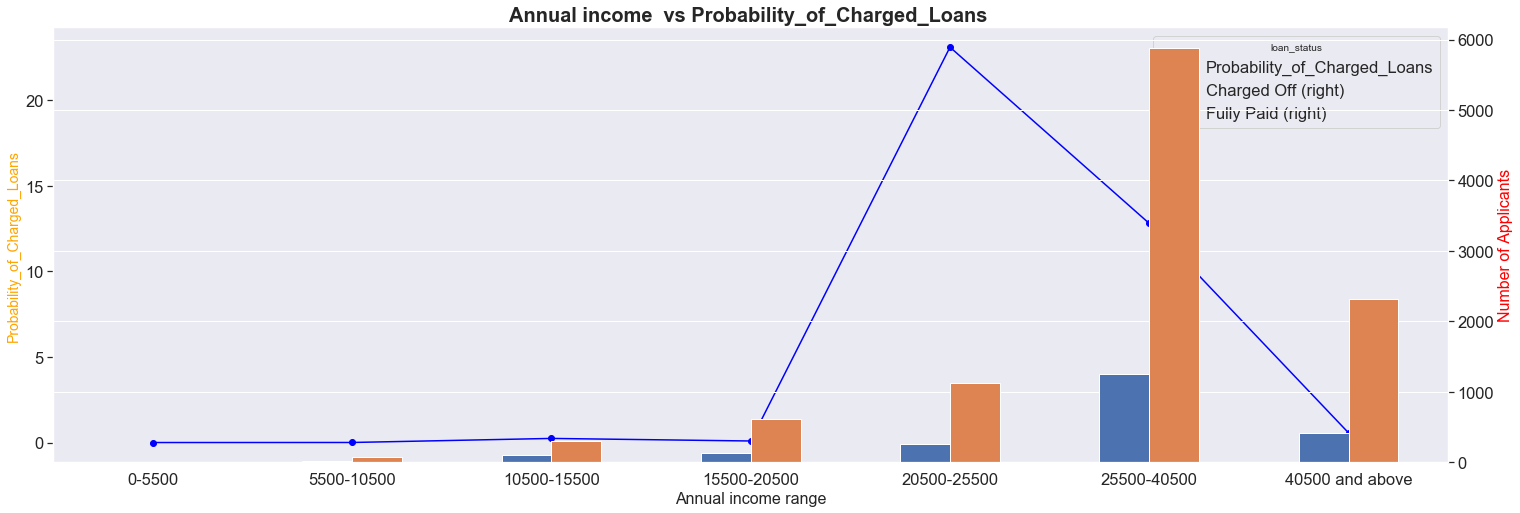

In [101]:
annual_inc_range = crosstab(cleansed_loans_inliers,'annual_inc_range')
display(annual_inc_range)
plotMajor = crosstab(cleansed_loans_inliers,'annual_inc_range') 
linePlot = plotMajor[['Probability_of_Charged_Loans']]      
barPlot =  plotMajor.iloc[:,0:2]
ax = linePlot.plot(figsize=(25,8), marker='o',color = 'blue')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=0,secondary_y=True)
ax.set_title('Annual income  vs Probability_of_Charged_Loans ',fontsize=20,weight="bold")
ax.set_xlabel('Annual income range',fontsize=16)
ax2.set_ylabel('Number of Applicants',color = 'red',fontsize=16)
ax.set_ylabel('Probability_of_Charged_Loans',color = 'orange',fontsize=14)
plt.show()

The people have income range 20500-25500 USD are more likely to be defaulters.

### Probabability of defaults by interest rates

In [102]:
buckets = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15.0 and above']
cleansed_loans_inliers['int_rate_range'] = pd.cut(cleansed_loans_inliers['int_rate'], buckets, labels=slot)

In [103]:
int_rate_range = crosstab(cleansed_loans_inliers,'int_rate_range')
display(int_rate_range)
plotMajor = crosstab(cleansed_loans_inliers,'int_rate_range') 
linePlot = plotMajor[['Probability_of_Charged_Loans']]      
barPlot =  plotMajor.iloc[:,0:2]
ax = linePlot.plot(figsize=(25,8), marker='o',color = 'blue')
ax2 = barPlot.plot(kind='bar',ax = ax,secondary_y=True)
ax.set_title('Interest Rate vs Probability of Charged Loans ',fontsize=20,weight="bold")
ax.set_xlabel('Interest Rate Range',fontsize=14,weight="bold",color = 'blue')
ax.set_ylabel('Probability_of_Charged_Loans',color = 'orange',fontsize=16)
ax2.set_ylabel('Number of Applicants',color = 'red',fontsize=16)
plt.show()

loan_status     Charged Off  Fully Paid   All  Probability_of_Charged_Loans
int_rate_range                                                             
0-7.5                   256        5084  7124                         0.036
7.5-10                  569        6318  8791                         0.065
10-12.5                1224        8083  5340                         0.229
12.5-15                1470        7321  9307                         0.158
15.0 and above         1775        5349  6887                         0.258

The income range of is the area where consumer is more likely to defaults.The bank should be more concious in giving the loans at 15 % or above . Also they can come up with the schemes where the bank can provide subsidy to consumers of these category in order to reduce their burden and hence reduce the no of defaulters.

### Probabability of defaults by Employee Lengths

loan_status  Charged Off  Fully Paid   All  Probability_of_Charged_Loans
emp_length                                                              
10                   227         801  1028                         0.221
1                   1090        6532  7622                         0.143
10                  1316        7038  8354                         0.158
2                    561        3684  4245                         0.132
3                    551        3426  3977                         0.139
4                    456        2859  3315                         0.138
5                    456        2712  3168                         0.144
6                    305        1846  2151                         0.142
7                    262        1435  1697                         0.154
8                    203        1216  1419                         0.143
9                    157        1058  1215                         0.129

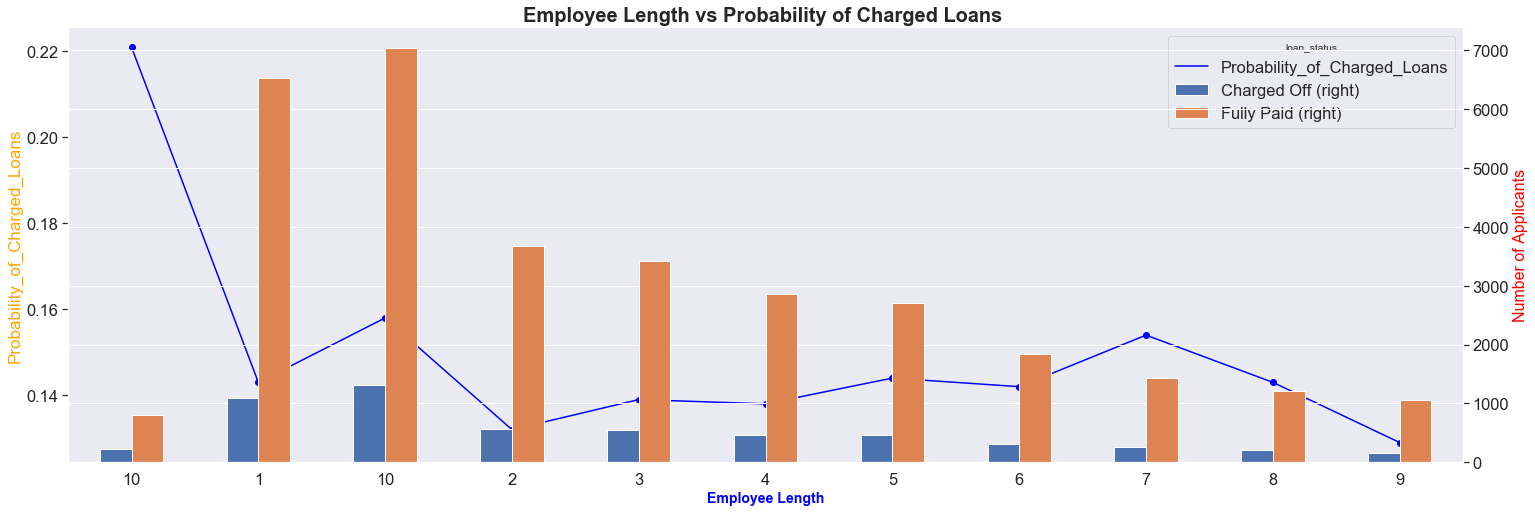

In [104]:
emp_length = crosstab(cleansed_loans_inliers,'emp_length')
display(emp_length)
plotMajor = crosstab(cleansed_loans_inliers,'emp_length') 
linePlot = plotMajor[['Probability_of_Charged_Loans']]      
barPlot =  plotMajor.iloc[:,0:2]
ax = linePlot.plot(figsize=(25,8), marker='o',color = 'blue')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=0,secondary_y=True)
ax.set_title('Employee Length vs Probability of Charged Loans ',fontsize=20,weight="bold")
ax.set_xlabel('Employee Length',fontsize=14,weight="bold",color = 'blue')
ax.set_ylabel('Probability_of_Charged_Loans',color = 'orange',fontsize=17)
ax2.set_ylabel('Number of Applicants',color = 'red',fontsize=16)
plt.show()

From the above plot it is evident applicant having experience of nearly 7 is more likely to be a defaulter.



##  <font color='maroon'>Conclusions : Lending Club Case Study</font> 


#### With the motive to determine the "attributes" that contribute for loan approval the team has put considerable amount of effort.  Below the key attributes that have impact on loan approval for any financial organisation

| Feature | Impact   | Remark|
|---------|----------|----------|
|   Recoveries     | High    | All charged off loans has recovery component
|   Purpose     | High    | Mostly the loans related to "small loans", "debt consolidation" and "credit cards" we at high default rate
|   Annual Income     | High    | The income was decently correlated. A certian band of seekers were at high risk of defaulting. Range of 23k to 25l
|   Total Payment     | High    | The lower the payment outstanding , the less risk was noted 
|   DTI     | Medium    | Any mean greater than data mean ~13 was noted at medium risk of defaulting.
|   Employee Length     | Medium    | It was noted employee who are closer to 7 year are risk of defaulting
|   Interest rate     | Medium    | The interest range between 12-17 were high default rate was noted
|   Home Ownership     | Medium    | Mortagage and Other residency were observed to have moderate risk of defaulting
|   Loan Enquiries     | Medium    | When the enquiries are increasing (>2 in past 6 months). The default risk rate is medium
